<center>
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Module%203/images/IDSNlogo.png" width="300" alt="cognitiveclass.ai logo"  />
</center>

# Data Analysis with Python

Estimated time needed: **30** minutes

## Objectives

After completing this lab you will be able to:

*   Explore features or charecteristics to predict price of car


<h2>Table of Contents</h2>

<div class="alert alert-block alert-info" style="margin-top: 20px">
<ol>
    <li><a href="https://#import_data">Import Data from Module</a></li>
    <li><a href="https://#pattern_visualization">Analyzing Individual Feature Patterns using Visualization</a></li>
    <li><a href="https://#discriptive_statistics">Descriptive Statistical Analysis</a></li>
    <li><a href="https://#basic_grouping">Basics of Grouping</a></li>
    <li><a href="https://#correlation_causation">Correlation and Causation</a></li>
    <li><a href="https://#anova">ANOVA</a></li>
    <li><a href="https://#GCT">Granger Causality Test</a></li>

</ol>

</div>

<hr>


<h3>What are the main characteristics that have the most impact on the coins price?</h3>


<h2 id="import_data">1. Import Data from Module 2</h2>


<h4>Setup</h4>


you are running the lab in your  browser, so we will install the libraries using `piplite`


In [28]:
#you are running the lab in your  browser, so we will install the libraries using ``piplite``
import piplite
await piplite.install(['pandas'])
await piplite.install(['matplotlib'])
await piplite.install(['scipy'])
await piplite.install(['seaborn'])
await piplite.install(['plotly'])
await piplite.install(['altair'])
await piplite.install(['mpl_finance'])

Import libraries:


If you run the lab locally using Anaconda, you can load the correct library and versions by uncommenting the following:


In [29]:
#If you run the lab locally using Anaconda, you can load the correct library and versions by uncommenting the following:
#install specific version of libraries used in lab
#! mamba install pandas==1.3.3
#! mamba install numpy=1.21.2
#! mamba install scipy=1.7.1-y
#!  mamba install seaborn=0.9.0-y

In [30]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings("ignore")

This function will download the dataset into your browser


In [31]:
#This function will download the dataset into your browser 

from pyodide.http import pyfetch

async def download(url, filename):
    response = await pyfetch(url)
    if response.status == 200:
        with open(filename, "wb") as f:
            f.write(await response.bytes())


Load the data and store it in dataframe `df`:


This dataset was hosted on IBM Cloud object. Click <a href="https://cocl.us/DA101EN_object_storage?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDA0101ENSkillsNetwork20235326-2021-01-01">HERE</a> for free storage.


In [32]:
#download all dataframes
host_path = 'https://1824251045.rsc.cdn77.org/web/algohouse/data'
data_files = ["DOGEBUSD_trades_1m.csv", "BTCBUSD_trades_1m.csv", "ETHBUSD_trades_1m.csv", "BNBBUSD_trades_1m.csv",
              "XRPBUSD_trades_1m.csv", "APEBUSD_trades_1m.csv", "ADABUSD_trades_1m.csv", "MATICBUSD_trades_1m.csv"]
for file in data_files:
    await download(f"{host_path}/{file}", file)

you will need to download the dataset; if you are running locally, please comment out the following


\#you will need to download the dataset; if you are running locally, please comment out the following
await download(path, "auto.csv")
path="auto.csv"


In [33]:
#read dataframe with information about DOGE
main_df = pd.read_csv("DOGEBUSD_trades_1m.csv", index_col = 0)
main_df["ts"] = main_df["ts"].astype("datetime64[ns]")

In [34]:
df = pd.DataFrame({})

for file in data_files:
    #read all other dataframes
    tmp = pd.read_csv(file, index_col = 0)
    df["ts"] = tmp["ts"].astype("datetime64[ns]")
    tmp = tmp.drop(["ts"], axis = 1)
    
    file_name = file.split("_")[0]
    tmp = tmp.add_suffix(f"_{file_name[0:-4]}")
    df = pd.concat([df, tmp], axis = 1)
#drop rows without data
df = df.dropna()

In [35]:
for column in df.columns:
    #save only columns with information about DOGE and with information about avg price
    if not "DOGE" in column and not "price" in column and not "ts" in column:
        df = df.drop(column, axis = 1)

In [36]:
df.head(5)

,ts,open_DOGE,high_DOGE,low_DOGE,close_DOGE,volume_DOGE,rec_count_DOGE,avg_price_DOGE,avg_price_BTC,avg_price_ETH,avg_price_BNB,avg_price_XRP,avg_price_APE,avg_price_ADA,avg_price_MATIC
0,2022-11-11 14:38:00,0.08139,0.08139,0.08065,0.08065,4523754.0,80.0,0.080926,16516.807793,1218.090000,283.244612,0.369150,3.084732,0.344496,0.993500
1,2022-11-11 14:39:00,0.08065,0.08078,0.08041,0.08043,5119775.0,77.0,0.080565,16473.844114,1213.655402,282.077591,0.367978,3.069644,0.343841,0.990534
2,2022-11-11 14:40:00,0.08039,0.08073,0.08035,0.08056,1460872.0,65.0,0.080577,16478.644495,1210.132181,281.679925,0.367303,3.071029,0.343694,0.989423
3,2022-11-11 14:41:00,0.08058,0.08103,0.08032,0.08092,2292152.0,75.0,0.080715,16516.504443,1210.617423,281.223183,0.367660,3.084393,0.343953,0.991930
4,2022-11-11 14:42:00,0.08099,0.08112,0.08071,0.08071,3044077.0,57.0,0.081038,16527.093981,1215.029038,281.912312,0.368224,3.088095,0.344382,0.993091


<h2 id="pattern_visualization">2. Analyzing Individual Feature Patterns Using Visualization</h2>


To install Seaborn we use pip, the Python package manager.


Import visualization packages "Matplotlib" and "Seaborn". Don't forget about "%matplotlib inline" to plot in a Jupyter notebook.


In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
%matplotlib inline 

<h4>How to choose the right visualization method?</h4>
<p>When visualizing individual variables, it is important to first understand what type of variable you are dealing with. This will help us find the right visualization method for that variable.</p>


In [38]:
# list the data types for each column
df["rec_count_DOGE"] = df["rec_count_DOGE"].astype("int")
print(df.dtypes)

ts                 datetime64[ns]
open_DOGE                 float64
high_DOGE                 float64
low_DOGE                  float64
close_DOGE                float64
volume_DOGE               float64
rec_count_DOGE              int32
avg_price_DOGE            float64
avg_price_BTC             float64
avg_price_ETH             float64
avg_price_BNB             float64
avg_price_XRP             float64
avg_price_APE             float64
avg_price_ADA             float64
avg_price_MATIC           float64
dtype: object


<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h3>Question  #1:</h3>

<b>What is the data type of the column "volume_DOGE"? </b>

</div>


In [39]:
# Write your code below and press Shift+Enter to execute 


<details><summary>Click here for the solution</summary>

```python
df['volume_DOGE'].dtypes
```

</details>


For example, we can calculate the correlation between variables  of type "int64" or "float64" using the method "corr":


In [40]:
corr = df.corr()
corr

,open_DOGE,high_DOGE,low_DOGE,close_DOGE,volume_DOGE,rec_count_DOGE,avg_price_DOGE,avg_price_BTC,avg_price_ETH,avg_price_BNB,avg_price_XRP,avg_price_APE,avg_price_ADA,avg_price_MATIC
open_DOGE,1.000000,0.999946,0.999944,0.999924,0.087025,0.328920,0.999958,0.350867,0.612679,0.811562,0.786526,0.570740,0.617773,0.666670
high_DOGE,0.999946,1.000000,0.999896,0.999954,0.092609,0.334008,0.999971,0.349248,0.611804,0.812286,0.786330,0.569146,0.618912,0.667024
low_DOGE,0.999944,0.999896,1.000000,0.999955,0.080905,0.323979,0.999971,0.352189,0.613311,0.810997,0.786835,0.572108,0.616841,0.666433
close_DOGE,0.999924,0.999954,0.999955,1.000000,0.086739,0.328937,0.999982,0.350736,0.612545,0.811624,0.786619,0.570722,0.617836,0.666716
volume_DOGE,0.087025,0.092609,0.080905,0.086739,1.000000,0.646198,0.086752,-0.074850,-0.025357,0.095295,0.047765,0.020494,0.039217,-0.013931
rec_count_DOGE,0.328920,0.334008,0.323979,0.328937,0.646198,1.000000,0.329038,-0.170052,0.022196,0.374529,0.219403,-0.014106,0.311302,0.175349
avg_price_DOGE,0.999958,0.999971,0.999971,0.999982,0.086752,0.329038,1.000000,0.350702,0.612549,0.811673,0.786614,0.570619,0.617907,0.666754
avg_price_BTC,0.350867,0.349248,0.352189,0.350736,-0.074850,-0.170052,0.350702,1.000000,0.879100,0.043043,0.267448,0.577588,-0.016388,0.473292
avg_price_ETH,0.612679,0.611804,0.613311,0.612545,-0.025357,0.022196,0.612549,0.879100,1.000000,0.355067,0.452767,0.529863,0.300945,0.724114
avg_price_BNB,0.811562,0.812286,0.810997,0.811624,0.095295,0.374529,0.811673,0.043043,0.355067,1.000000,0.831284,0.264489,0.768133,0.611684


The diagonal elements are always one; we will study correlation more precisely Pearson correlation in-depth at the end of the notebook.
Lets take a look on corelation heatmap of our data:

<AxesSubplot:>

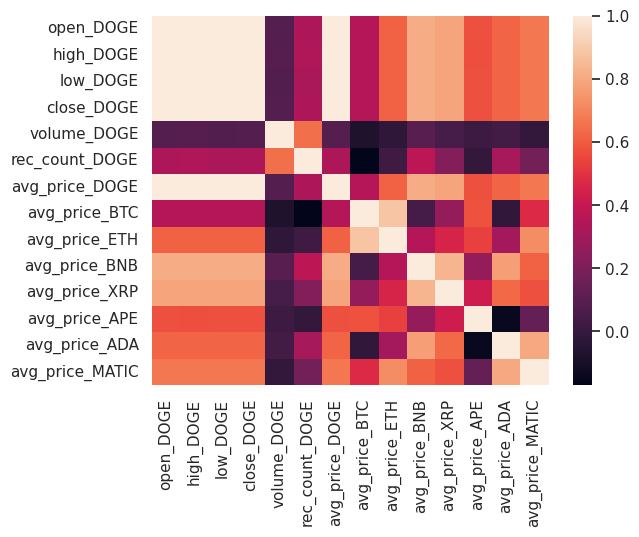

In [41]:
sns.heatmap(corr)

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h3> Question  #2: </h3>

<p>Find the correlation between the following columns: volume_DOGE, open_DOGE, close_DOGE and rec_count_DOGE.</p>
<p>Hint: if you would like to select those columns, use the following syntax: df[['volume_DOGE', 'open_DOGE', 'close_DOGE', 'rec_count_DOGE']]</p>
</div>


In [42]:
# Write your code below and press Shift+Enter to execute 


<details><summary>Click here for the solution</summary>

```python
df[['volume_DOGE', 'open_DOGE', 'close_DOGE', 'rec_count_DOGE']].corr()
```

</details>


<h2>Continuous Numerical Variables:</h2> 

<p>Continuous numerical variables are variables that may contain any value within some range. They can be of type "int64" or "float64". A great way to visualize these variables is by using scatterplots with fitted lines.</p>

<p>In order to start understanding the (linear) relationship between an individual variable and the price, we can use "regplot" which plots the scatterplot plus the fitted regression line for the data.</p>


Let's see several examples of different linear relationships:


<h3>Positive Linear Relationship</h4>


Let's find the scatterplot of "avg_price_ADA" and "avg_price_APE".


(0.0, 4.559782712635168)

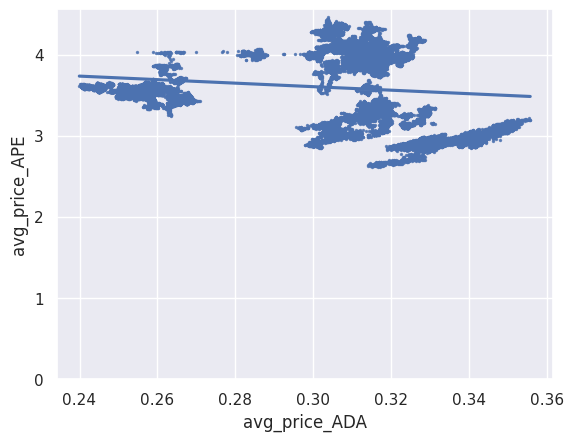

In [43]:
# Engine size as potential predictor variable of price
sns.regplot(x="avg_price_ADA", y ="avg_price_APE", data=df, scatter_kws={'s':2})
plt.ylim(0,)

<p>As the avg_price_APE goes up, the avg_price_ADA goes down: this indicates a negative direct correlation between these two variables. avg_price_APE seems like a pretty good predictor of price since the regression line is almost a diagonal line.</p>


We can examine the correlation between 'avg_price_APE' and 'avg_price_ADA' and see that it's approximately -0.144273.


In [44]:
df[["avg_price_ADA", "avg_price_APE"]].corr()

,avg_price_ADA,avg_price_APE
avg_price_ADA,1.000000,-0.144273
avg_price_APE,-0.144273,1.000000


avg_price_DOGE is a potential predictor variable of avg_price_BNB. Let's find the scatterplot of "avg_price_DOGE" and "avg_price_BNB".


<AxesSubplot:xlabel='avg_price_DOGE', ylabel='avg_price_BNB'>

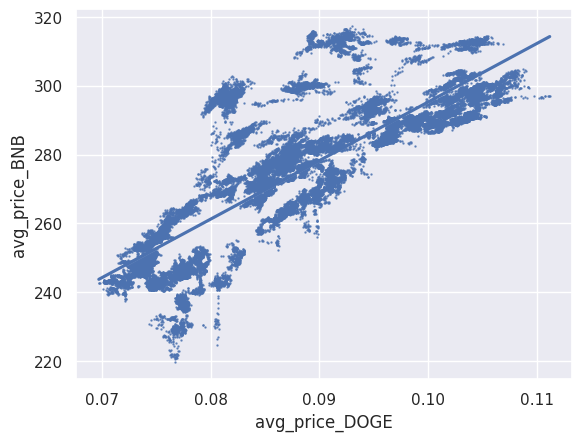

In [45]:
sns.regplot(x="avg_price_DOGE", y="avg_price_BNB", data=df, scatter_kws={'s':0.5})

<p>As avg_price_DOGE goes up, the avg_price_BNB goes down: this indicates an positive relationship between these two variables. avg_price_DOGE could potentially be a predictor of avg_price_BNB.</p>


We can examine the correlation between 'avg_price_DOGE' and 'avg_price_BNB' and see it's approximately 0.811673.


In [46]:
df[['avg_price_DOGE', 'avg_price_BNB']].corr()

,avg_price_DOGE,avg_price_BNB
avg_price_DOGE,1.000000,0.811673
avg_price_BNB,0.811673,1.000000


<h3>Weak Linear Relationship</h3>


Let's see if "avg_price_ADA" is a predictor variable of "avg_price_BTC".


<AxesSubplot:xlabel='avg_price_ADA', ylabel='avg_price_BTC'>

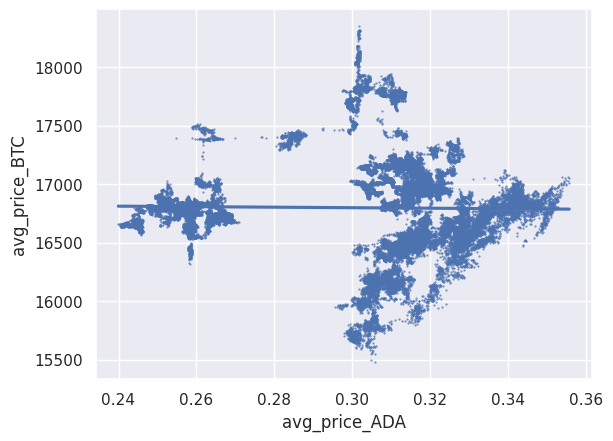

In [47]:
sns.regplot(x="avg_price_ADA", y="avg_price_BTC", data=df, scatter_kws={'s':0.3})

<p>avg_price_ADA does not seem like a good predictor of the avg_price_BTC at all since the regression line is close to horizontal. Also, the data points are very scattered and far from the fitted line, showing lots of variability. Therefore, it's not a reliable variable.</p>


We can examine the correlation between 'avg_price_ADA' and 'avg_price_BTC' and see it's approximately -0.016388.


In [48]:
df[['avg_price_ADA','avg_price_BTC']].corr()

,avg_price_ADA,avg_price_BTC
avg_price_ADA,1.000000,-0.016388
avg_price_BTC,-0.016388,1.000000


 <div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question  3 a): </h1>

<p>Find the correlation  between x="avg_price_DOGE" and y="avg_price_BTC".</p>
<p>Hint: if you would like to select those columns, use the following syntax: df[["avg_price_DOGE","avg_price_BTC"]].  </p>
</div>


In [49]:
# Write your code below and press Shift+Enter to execute


<details><summary>Click here for the solution</summary>

```python


df[["avg_price_DOGE", "avg_price_BTC"]].corr()

```

</details>


<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1>Question  3 b):</h1>

<p>Given the correlation results between "Open_DOGE" and "Open_BTC", do you expect a linear relationship?</p> 
<p>Verify your results using the function "regplot()".</p>
</div>


In [50]:
# Write your code below and press Shift+Enter to execute 


<details><summary>Click here for the solution</summary>

```python

#Code: 
sns.regplot(x="Open_DOGE", y="Open_BTC", data=df)

```

</details>


<h3>Categorical Variables</h3>

<p>These are variables that describe a 'characteristic' of a data unit, and are selected from a small group of categories. The categorical variables can have the type "object" or "int64". A good way to visualize categorical variables is by using boxplots.</p>


In [51]:
from mpl_finance import candlestick_ohlc
import matplotlib.dates as mpl_dates

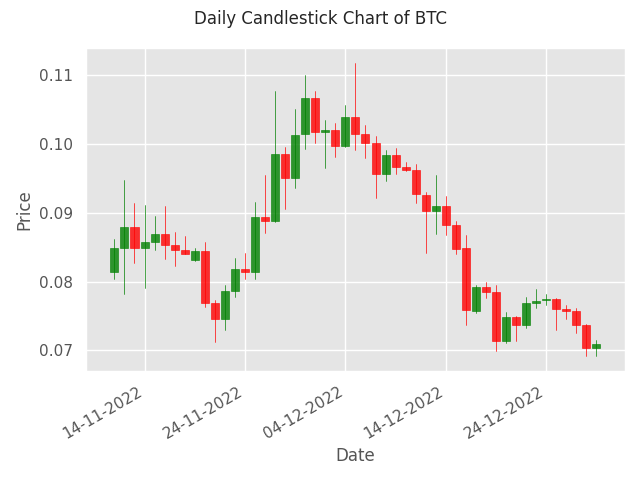

<Figure size 640x480 with 0 Axes>

In [52]:
main = pd.read_csv("DOGEBUSD_trades_1m.csv", index_col=0, low_memory=False)
main["ts"] = pd.to_datetime(main_df["ts"])

plt.style.use('ggplot')

# Extracting Data for plotting
ohlc = main.loc[:, ['ts', 'open', 'high', 'low', 'close', 'volume']]

ohlc['ts'] = pd.to_datetime(ohlc['ts'])
ohlc.index = ohlc['ts']

ohlc = ohlc.resample("1d").agg({
    "open": "first",
    "high": "max",
    "low": "min",
    "close": "last",
    "volume": "sum"
})

ohlc['ts'] = ohlc.index
ohlc['ts'] = ohlc['ts'].apply(mpl_dates.date2num)


# Creating Subplots
fig, ax = plt.subplots()

candlestick_ohlc(ax, zip(ohlc["ts"], ohlc["open"], ohlc["high"], ohlc["low"], ohlc["close"], ohlc["volume"]), width=0.8, colorup='green', colordown='red', alpha=0.8)

# Setting labels & titles
ax.set_xlabel('Date')
ax.set_ylabel('Price')
fig.suptitle('Daily Candlestick Chart of BTC')

# Formatting Date
date_format = mpl_dates.DateFormatter('%d-%m-%Y')
ax.xaxis.set_major_formatter(date_format)
fig.autofmt_xdate()

fig.tight_layout()

plt.show()

Let's look at the relationship between "avg_price_BTC" and "avg_price_APE".


First of all, lets make some bins(like in lab2) to make analysis based on groups.

In [53]:
bins = np.linspace(min(df["avg_price_BTC"]), max(df["avg_price_BTC"]), 6)
bins

array([15479.29012641, 16053.86336151, 16628.43659662, 17203.00983172,
       17777.58306683, 18352.15630194])

In [54]:
group_names = ['Low', 'Low-Medium', 'Medium', 'Medium-High', 'High']
df['avg_price_BTC-binned'] = pd.cut(df['avg_price_BTC'], bins, labels = group_names, include_lowest = True )
df[['avg_price_BTC','avg_price_BTC-binned']].head()

,avg_price_BTC,avg_price_BTC-binned
0,16516.807793,Low-Medium
1,16473.844114,Low-Medium
2,16478.644495,Low-Medium
3,16516.504443,Low-Medium
4,16527.093981,Low-Medium


<AxesSubplot:xlabel='avg_price_BTC-binned', ylabel='avg_price_APE'>

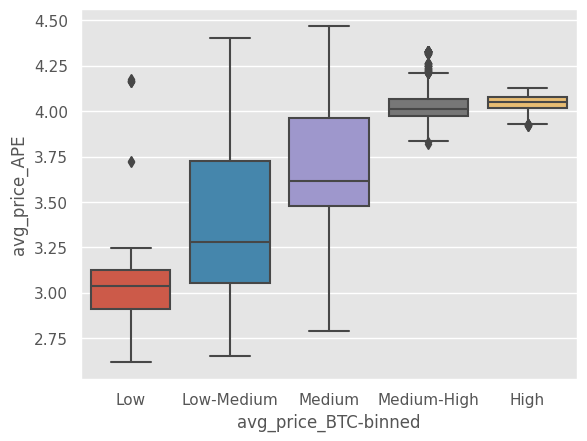

In [55]:
sns.boxplot(x="avg_price_BTC-binned", y="avg_price_APE", data=df)

<p>We see that the distributions of avg_price_APE between the avg_price_BTC categories have a significant overlap, so avg_price_APE would not be a good predictor of avg_price_BTC. Let's examine engine "avg_price_DOGE" and "avg_price_BTC":</p>


In [56]:
bins = np.linspace(min(df["avg_price_DOGE"]), max(df["avg_price_DOGE"]), 6)
bins

array([0.06972246, 0.0780152 , 0.08630794, 0.09460067, 0.10289341,
       0.11118615])

In [57]:
group_names = ['Low', 'Low-Medium', 'Medium', 'Medium-High', 'High']
df['avg_price_DOGE-binned'] = pd.cut(df['avg_price_DOGE'], bins, labels = group_names, include_lowest = True )
df[['avg_price_DOGE','avg_price_DOGE-binned']].head()

,avg_price_DOGE,avg_price_DOGE-binned
0,0.080926,Low-Medium
1,0.080565,Low-Medium
2,0.080577,Low-Medium
3,0.080715,Low-Medium
4,0.081038,Low-Medium


<AxesSubplot:xlabel='avg_price_DOGE-binned', ylabel='avg_price_BTC'>

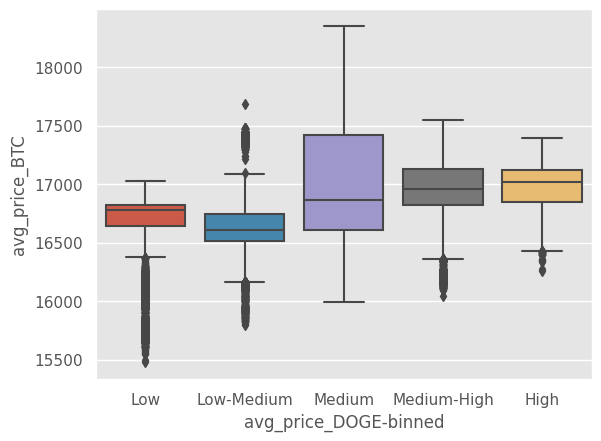

In [58]:
sns.boxplot(x = "avg_price_DOGE-binned", y = "avg_price_BTC", data = df)

<p>Here we see that the distribution of avg_price_BTC between these 5 avg_price_DOGE categories, are distinct enough to take avg_price_BTC as a potential good predictor of avg_price_DOGE.</p>


Let's examine "avg_price_BNB" and "avg_price_ADA".


In [59]:
bins = np.linspace(min(df["avg_price_BNB"]), max(df["avg_price_BNB"]), 6)
bins

array([219.63313111, 239.16968751, 258.70624391, 278.24280031,
       297.77935671, 317.31591311])

In [60]:
group_names = ['Low', 'Low-Medium', 'Medium', 'Medium-High', 'High']
df['avg_price_BNB-binned'] = pd.cut(df['avg_price_BNB'], bins, labels = group_names, include_lowest = True )
df[['avg_price_BNB','avg_price_BNB-binned']].head()

,avg_price_BNB,avg_price_BNB-binned
0,283.244612,Medium-High
1,282.077591,Medium-High
2,281.679925,Medium-High
3,281.223183,Medium-High
4,281.912312,Medium-High


<AxesSubplot:xlabel='avg_price_BNB-binned', ylabel='avg_price_ADA'>

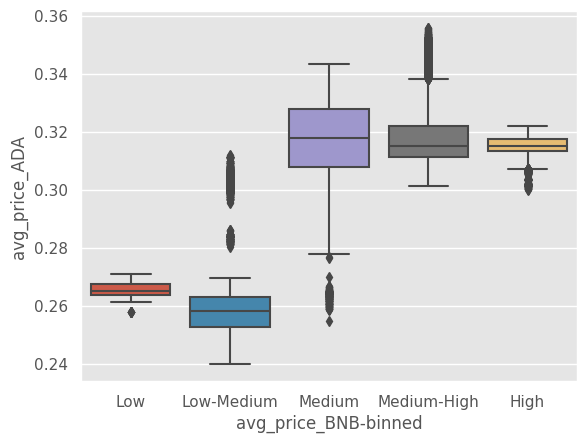

In [61]:
# drive-wheels
sns.boxplot(x="avg_price_BNB-binned", y="avg_price_ADA", data=df)

<p>Here we see that the distribution of avg_price_ADA between the different avg_price_BNB categories differs. As such, avg_price_ADA could potentially be a predictor of avg_price_BNB.</p>


<h2 id="discriptive_statistics">3. Descriptive Statistical Analysis</h2>


<p>Let's first take a look at the variables by utilizing a description method.</p>

<p>The <b>describe</b> function automatically computes basic statistics for all continuous variables. Any NaN values are automatically skipped in these statistics.</p>

This will show:

<ul>
    <li>the count of that variable</li>
    <li>the mean</li>
    <li>the standard deviation (std)</li> 
    <li>the minimum value</li>
    <li>the IQR (Interquartile Range: 25%, 50% and 75%)</li>
    <li>the maximum value</li>
<ul>


We can apply the method "describe" as follows:


In [62]:
df.describe()

,open_DOGE,high_DOGE,low_DOGE,close_DOGE,volume_DOGE,rec_count_DOGE,avg_price_DOGE,avg_price_BTC,avg_price_ETH,avg_price_BNB,avg_price_XRP,avg_price_APE,avg_price_ADA,avg_price_MATIC
count,65303.000000,65303.000000,65303.000000,65303.000000,6.530300e+04,65303.000000,65303.000000,65303.000000,65303.000000,65303.000000,65303.000000,65303.000000,65303.000000,65303.000000
mean,0.087632,0.087694,0.087570,0.087631,1.342902e+06,27.224186,0.087632,16799.756755,1227.339145,274.205824,0.374746,3.602549,0.301705,0.866637
std,0.010017,0.010030,0.010006,0.010017,2.610568e+06,18.276423,0.010017,374.247539,46.126568,21.008689,0.019187,0.421427,0.028018,0.054157
min,0.069650,0.069950,0.069160,0.069670,5.300000e+01,1.000000,0.069722,15479.290126,1075.992278,219.633131,0.321119,2.618512,0.239938,0.759138
25%,0.077890,0.077920,0.077860,0.077890,2.804810e+05,14.000000,0.077888,16580.772310,1201.056409,251.806418,0.355706,3.263368,0.267900,0.812006
50%,0.086640,0.086730,0.086550,0.086640,6.422740e+05,23.000000,0.086640,16809.581543,1219.647264,276.917888,0.379649,3.596970,0.311906,0.871966
75%,0.096630,0.096670,0.096600,0.096630,1.415020e+06,36.000000,0.096636,16975.925158,1265.403305,290.604014,0.389441,3.968889,0.318821,0.911075
max,0.111610,0.111840,0.110860,0.111580,7.413018e+07,119.000000,0.111186,18352.156302,1347.805427,317.315913,0.417387,4.467341,0.355647,1.064086


The default setting of "describe" skips variables of type category. We can apply the method "describe" on the variables of type 'category' as follows:


In [63]:
df.describe(include=['category'])

,avg_price_BTC-binned,avg_price_DOGE-binned,avg_price_BNB-binned
count,65303,65303,65303
unique,5,5,5
top,Medium,Low,Medium-High
freq,40686,16868,24980


<h2 id="basic_grouping">4. Basics of Grouping</h2>


<p>The "groupby" method groups data by different categories. The data is grouped based on one or several variables, and analysis is performed on the individual groups.</p>

<p>For example, let's group by the variable "avg_price_DOGE-binned". We see that there are 5 different categories of avg_price_DOGE-binned.</p>


In [64]:
df['avg_price_DOGE-binned'].unique()

['Low-Medium', 'Medium', 'Low', 'Medium-High', 'High']
Categories (5, object): ['Low' < 'Low-Medium' < 'Medium' < 'Medium-High' < 'High']

<p>If we want to know, on average, which type of drive wheel is most valuable, we can group "avg_price_DOGE-binned" and then average them.</p>

<p>We can select the columns 'avg_price_DOGE-binned' and 'avg_price_DOGE', then assign it to the variable "df_group_one".</p>


In [65]:
df_group_one = df[['avg_price_DOGE-binned', 'avg_price_DOGE']]

We can then calculate the average price for each of the different categories of data.


In [66]:
# grouping results
df_group_one = df_group_one.groupby(['avg_price_DOGE-binned'], as_index = False).mean()
df_group_one

,avg_price_DOGE-binned,avg_price_DOGE
0,Low,0.075388
1,Low-Medium,0.082717
2,Medium,0.089475
3,Medium-High,0.098599
4,High,0.104514


<p>You can also group by multiple variables. For example, let's group by both 'avg_price_DOGE-binned' and 'avg_price_BTC-binned'. This groups the dataframe by the unique combination of 'avg_price_DOGE-binned' and 'avg_price_BTC-binned'. We can store the results in the variable 'grouped_test1'.</p>


In [67]:
# grouping results
df_gptest = df[["avg_price_DOGE-binned", "avg_price_BTC-binned", "avg_price_DOGE"]]
grouped_test1 = df_gptest.groupby(["avg_price_DOGE-binned", "avg_price_BTC-binned"], as_index=False).mean()
grouped_test1

,avg_price_DOGE-binned,avg_price_BTC-binned,avg_price_DOGE
0,Low,Low,0.074684
1,Low,Low-Medium,0.075087
2,Low,Medium,0.075525
3,Low,Medium-High,NaN
4,Low,High,NaN
5,Low-Medium,Low,0.081068
6,Low-Medium,Low-Medium,0.082736
7,Low-Medium,Medium,0.082427
8,Low-Medium,Medium-High,0.085580
9,Low-Medium,High,NaN


<p>This grouped data is much easier to visualize when it is made into a cross table. A cross table is a two-way table consisting of columns and rows. It is also known as a pivot table or a multi-dimensional table. Its greatest strength is its ability to structure, summarize and display large amounts of data. Cross tables can also be used to determine whether there is a relation between the row variable and the column variable or not.
    
    
<p>In this case, we will leave the avg_price_DOGE-binned variable as the rows of the table, and cross avg_price_BTC-binned to become the columns of the table:</p>


In [68]:
cross_table = pd.crosstab(df["avg_price_DOGE-binned"], df["avg_price_BTC-binned"])
cross_table

avg_price_BTC-binned,Low,Low-Medium,Medium,Medium-High,High
avg_price_DOGE-binned,,,,,
Low,1624,2168,13076,0,0
Low-Medium,222,7766,6193,702,0
Medium,8,3443,5963,2077,1509
Medium-High,1,2454,12109,858,0
High,0,1001,3345,784,0


<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1>Question 4:</h1>

<p>Use the "groupby" function to find the average "avg_price_BTC" of each car based on "avg_price_BTC-binned".</p>
</div>


In [69]:
# Write your code below and press Shift+Enter to execute 
# grouping results


<details><summary>Click here for the solution</summary>

```python
# grouping results
df_gptest2 = df[['avg_price_BTC-binned', 'avg_price_BTC']]
grouped_test_bodystyle = df_gptest2.groupby(['avg_price_BTC-binned'],as_index= False).mean()
grouped_test_bodystyle

```

</details>


If you did not import "pyplot", let's do it again.


In [70]:
import matplotlib.pyplot as plt
%matplotlib inline 

<h4>Variables: avg_price_DOGE-binned vs. avg_price_BTC-binned</h4>


Let's use a heat map to visualize the relationship between avg_price_DOGE-binned vs avg_price_BTC-binned.

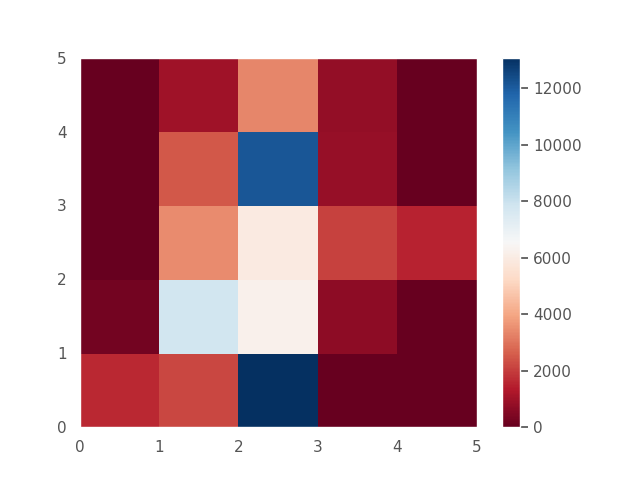

<Figure size 640x480 with 0 Axes>

In [71]:
#use the grouped results
plt.grid(False)
plt.pcolor(cross_table, cmap='RdBu')

plt.colorbar()
plt.show()

<p>The heatmap plots the target variable (avg_price_BTC-binned) proportional to colour with respect to the variable 'avg_price_DOGE-binned' on the vertical and horizontal axis, respectively. This allows us to visualize how the avg_price_BTC-binned is related to 'avg_price_DOGE-binned'.</p>

<p>The default labels convey no useful information to us. Let's change that:</p>


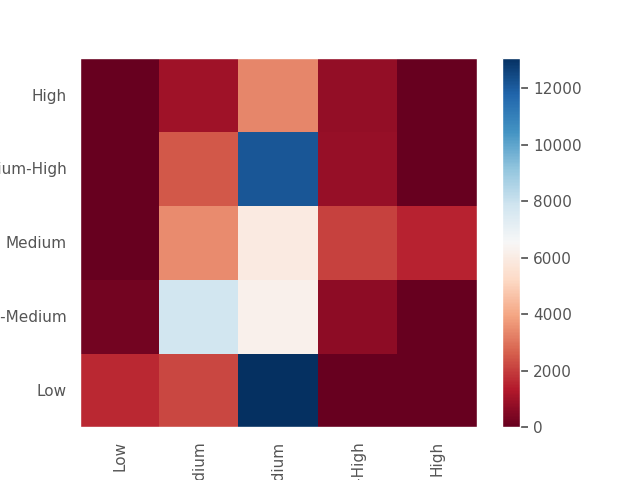

<Figure size 640x480 with 0 Axes>

In [72]:
fig, ax = plt.subplots()
plt.grid(False)
im = ax.pcolor(cross_table, cmap='RdBu')

#label names
row_labels = cross_table.columns.categories
col_labels = cross_table.index

#move ticks and labels to the center
ax.set_xticks(np.arange(cross_table.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(cross_table.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

#rotate label if too long
plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()

<p>Visualization is very important in data science, and Python visualization packages provide great freedom. We will go more in-depth in a separate Python visualizations course.</p>

<p>The main question we want to answer in this module is, "What are the main characteristics which have the most impact on the coins price?".</p>

<p>To get a better measure of the important characteristics, we look at the correlation of these variables with the coins price. In other words: how is the coin price dependent on this variable?</p>


<h2 id="correlation_causation">5. Correlation and Causation</h2>


<p><b>Correlation</b>: a measure of the extent of interdependence between variables.</p>

<p><b>Causation</b>: the relationship between cause and effect between two variables.</p>

<p>It is important to know the difference between these two. Correlation does not imply causation. Determining correlation is much simpler  the determining causation as causation may require independent experimentation.</p>


<p><b>Pearson Correlation</b></p>
<p>The Pearson Correlation measures the linear dependence between two variables X and Y.</p>
<p>The resulting coefficient is a value between -1 and 1 inclusive, where:</p>
<ul>
    <li><b>1</b>: Perfect positive linear correlation.</li>
    <li><b>0</b>: No linear correlation, the two variables most likely do not affect each other.</li>
    <li><b>-1</b>: Perfect negative linear correlation.</li>
</ul>


<p>Pearson Correlation is the default method of the function "corr". Like before, we can calculate the Pearson Correlation of the of the 'int64' or 'float64'  variables.</p>


In [73]:
df.corr()

,open_DOGE,high_DOGE,low_DOGE,close_DOGE,volume_DOGE,rec_count_DOGE,avg_price_DOGE,avg_price_BTC,avg_price_ETH,avg_price_BNB,avg_price_XRP,avg_price_APE,avg_price_ADA,avg_price_MATIC
open_DOGE,1.000000,0.999946,0.999944,0.999924,0.087025,0.328920,0.999958,0.350867,0.612679,0.811562,0.786526,0.570740,0.617773,0.666670
high_DOGE,0.999946,1.000000,0.999896,0.999954,0.092609,0.334008,0.999971,0.349248,0.611804,0.812286,0.786330,0.569146,0.618912,0.667024
low_DOGE,0.999944,0.999896,1.000000,0.999955,0.080905,0.323979,0.999971,0.352189,0.613311,0.810997,0.786835,0.572108,0.616841,0.666433
close_DOGE,0.999924,0.999954,0.999955,1.000000,0.086739,0.328937,0.999982,0.350736,0.612545,0.811624,0.786619,0.570722,0.617836,0.666716
volume_DOGE,0.087025,0.092609,0.080905,0.086739,1.000000,0.646198,0.086752,-0.074850,-0.025357,0.095295,0.047765,0.020494,0.039217,-0.013931
rec_count_DOGE,0.328920,0.334008,0.323979,0.328937,0.646198,1.000000,0.329038,-0.170052,0.022196,0.374529,0.219403,-0.014106,0.311302,0.175349
avg_price_DOGE,0.999958,0.999971,0.999971,0.999982,0.086752,0.329038,1.000000,0.350702,0.612549,0.811673,0.786614,0.570619,0.617907,0.666754
avg_price_BTC,0.350867,0.349248,0.352189,0.350736,-0.074850,-0.170052,0.350702,1.000000,0.879100,0.043043,0.267448,0.577588,-0.016388,0.473292
avg_price_ETH,0.612679,0.611804,0.613311,0.612545,-0.025357,0.022196,0.612549,0.879100,1.000000,0.355067,0.452767,0.529863,0.300945,0.724114
avg_price_BNB,0.811562,0.812286,0.810997,0.811624,0.095295,0.374529,0.811673,0.043043,0.355067,1.000000,0.831284,0.264489,0.768133,0.611684


Sometimes we would like to know the significant of the correlation estimate.


<b>P-value</b>

<p>What is this P-value? The P-value is the probability value that the correlation between these two variables is statistically significant. Normally, we choose a significance level of 0.05, which means that we are 95% confident that the correlation between the variables is significant.</p>

By convention, when the

<ul>
    <li>p-value is $<$ 0.001: we say there is strong evidence that the correlation is significant.</li>
    <li>the p-value is $<$ 0.05: there is moderate evidence that the correlation is significant.</li>
    <li>the p-value is $<$ 0.1: there is weak evidence that the correlation is significant.</li>
    <li>the p-value is $>$ 0.1: there is no evidence that the correlation is significant.</li>
</ul>


We can obtain this information using  "stats" module in the "scipy"  library.


In [74]:
from scipy import stats

<h3>avg_price_BTC vs. avg_price_DOGE</h3>


Let's calculate the  Pearson Correlation Coefficient and P-value of 'avg_price_BTC' and 'avg_price_DOGE'.


In [75]:
pearson_coef, p_value = stats.pearsonr(df['avg_price_BTC'], df['avg_price_DOGE'])
print("The Pearson Correlation Coefficient is", round(pearson_coef, 2), " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.35  with a P-value of P = 0.0


<h4>Conclusion:</h4>
<p>Since the p-value is $<$ 0.001, the correlation between avg_price_BTC and avg_price_DOGE is statistically significant, although the linear relationship isn't extremely strong (~0.35).</p>


<h3>avg_price_ETH vs. avg_price_DOGE</h3>


Let's calculate the  Pearson Correlation Coefficient and P-value of 'avg_price_ETH' and 'avg_price_DOGE'.


In [76]:
pearson_coef, p_value = stats.pearsonr(df['avg_price_ETH'], df['avg_price_DOGE'])
print("The Pearson Correlation Coefficient is", round(pearson_coef, 2), " with a P-value of P = ", p_value)  

The Pearson Correlation Coefficient is 0.61  with a P-value of P =  0.0


<h4>Conclusion:</h4>

<p>Since the p-value is $<$ 0.001, the correlation between avg_price_ETH and avg_price_DOGE is statistically significant, and the linear relationship is quite strong (~0.809, close to 1).</p>


<h3>avg_price_BNB vs. avg_price_DOGE</h3>

Let's calculate the  Pearson Correlation Coefficient and P-value of 'avg_price_BNB' and 'avg_price_DOGE'.


In [77]:
pearson_coef, p_value = stats.pearsonr(df['avg_price_BNB'], df['avg_price_DOGE'])
print("The Pearson Correlation Coefficient is", round(pearson_coef, 2), " with a P-value of P = ", p_value)  

The Pearson Correlation Coefficient is 0.81  with a P-value of P =  0.0


<h4>Conclusion:</h4>
<p>Since the p-value is $<$ 0.001, the correlation between avg_price_BNB and avg_price_DOGE is statistically significant, and the linear relationship is moderately strong (~0.81).</p>


<h3>avg_price_XRP vs. avg_price_DOGE</h3>


Let's calculate the Pearson Correlation Coefficient and P-value of 'avg_price_XRP' and 'avg_price_DOGE':


In [78]:
pearson_coef, p_value = stats.pearsonr(df['avg_price_XRP'], df['avg_price_DOGE'])
print("The Pearson Correlation Coefficient is", round(pearson_coef, 2), " with a P-value of P =", p_value ) 

The Pearson Correlation Coefficient is 0.79  with a P-value of P = 0.0


#### Conclusion:

Since the p-value is < 0.001, the correlation between avg_price_XRP and avg_price_DOGE is statistically significant, and the linear relationship is quite strong (\~0.78).


### avg_price_APE vs. avg_price_DOGE


Let's calculate the Pearson Correlation Coefficient and P-value of 'avg_price_APE' and 'avg_price_DOGE':


In [79]:
pearson_coef, p_value = stats.pearsonr(df['avg_price_APE'], df['avg_price_DOGE'])
print( "The Pearson Correlation Coefficient is", round(pearson_coef, 2), " with a P-value of P = ", p_value)  

The Pearson Correlation Coefficient is 0.57  with a P-value of P =  0.0


<h4>Conclusion:</h4>
<p>Since the p-value is $<$ 0.001, the correlation between avg_price_APE and avg_price_DOGE is statistically significant, and the linear relationship is quite strong (~0.57).</p>


<h3>avg_price_ADA vs. avg_price_DOGE</h3>

Let's calculate the Pearson Correlation Coefficient and P-value of 'avg_price_ADA' and 'avg_price_DOGE':


In [80]:
pearson_coef, p_value = stats.pearsonr(df['avg_price_ADA'], df['avg_price_DOGE'])
print("The Pearson Correlation Coefficient is", round(pearson_coef, 2), " with a P-value of P =", p_value) 

The Pearson Correlation Coefficient is 0.62  with a P-value of P = 0.0


<h4>Conclusion:</h4>

<p>Since the p-value is $<$ 0.001, the correlation between avg_price_ADA and avg_price_DOGE is statistically significant, and the linear relationship is quite strong (~0.61).</p>


<h3>avg_price_MATIC vs. avg_price_DOGE</h3>


Let's calculate the  Pearson Correlation Coefficient and P-value of 'avg_price_MATIC' and 'avg_price_DOGE':


In [81]:
pearson_coef, p_value = stats.pearsonr(df['avg_price_MATIC'], df['avg_price_DOGE'])
print("The Pearson Correlation Coefficient is", round(pearson_coef, 2), " with a P-value of P =  ", p_value ) 

The Pearson Correlation Coefficient is 0.67  with a P-value of P =   0.0


<h4>Conclusion:</h4>
<p>Since the p-value is $<$ 0.001, the correlation between avg_price_MATIC and avg_price_DOGE is statistically significant, but the linear relationship is only moderate (~0.66).</p>


We can relate the process for each 'city-mpg'  and 'highway-mpg':


<h3>avg_price_DOGE vs. avg_price_BNB</h3>


In [82]:
pearson_coef, p_value = stats.pearsonr(df['avg_price_DOGE'], df['avg_price_BNB'])
print("The Pearson Correlation Coefficient is", round(pearson_coef, 2), " with a P-value of P = ", p_value)  

The Pearson Correlation Coefficient is 0.81  with a P-value of P =  0.0


<h4>Conclusion:</h4>
<p>Since the p-value is $<$ 0.001, the correlation between avg_price_DOGE and avg_price_BNB is statistically significant, and the coefficient of about 0.81 shows that the relationship is very strong.</p>


<h3>avg_price_BTC vs. avg_price_ETH</h3>


In [83]:
pearson_coef, p_value = stats.pearsonr(df['avg_price_BTC'], df['avg_price_ETH'])
print( "The Pearson Correlation Coefficient is", round(pearson_coef, 2), " with a P-value of P = ", p_value ) 

The Pearson Correlation Coefficient is 0.88  with a P-value of P =  0.0


#### Conclusion:

Since the p-value is < 0.001, the correlation between avg_price_BTC and avg_price_ETH is statistically significant, and the coefficient of about 0.87 shows that the relationship is  moderately strong.


<h2 id="anova">6. ANOVA</h2>


<h3>ANOVA: Analysis of Variance</h3>
<p>The Analysis of Variance  (ANOVA) is a statistical method used to test whether there are significant differences between the means of two or more groups. ANOVA returns two parameters:</p>

<p><b>F-test score</b>: ANOVA assumes the means of all groups are the same, calculates how much the actual means deviate from the assumption, and reports it as the F-test score. A larger score means there is a larger difference between the means.</p>

<p><b>P-value</b>:  P-value tells how statistically significant our calculated score value is.</p>

<p>If our price variable is strongly correlated with the variable we are analyzing, we expect ANOVA to return a sizeable F-test score and a small p-value.</p>


<h2>avg_price_DOGE</h2>

<p>Since ANOVA analyzes the difference between different groups of the same variable, the groupby function will come in handy. Because the ANOVA algorithm averages the data automatically, we do not need to take the average before hand.</p>

<p>To see if different types of 'avg_price_DOGE-binned' impact  'avg_price_DOGE', we group the data.</p>


In [84]:
grouped_test2=df_gptest[['avg_price_DOGE-binned', 'avg_price_DOGE']].groupby(['avg_price_DOGE-binned'])
grouped_test2.head(2)

,avg_price_DOGE-binned,avg_price_DOGE
0,Low-Medium,0.080926
1,Low-Medium,0.080565
1005,Medium,0.087683
1006,Medium,0.088650
12178,Low,0.077947
12179,Low,0.077963
19553,Medium-High,0.094660
19643,Medium-High,0.094652
21590,High,0.104010
21591,High,0.103884


In [85]:
df_gptest

,avg_price_DOGE-binned,avg_price_BTC-binned,avg_price_DOGE
0,Low-Medium,Low-Medium,0.080926
1,Low-Medium,Low-Medium,0.080565
2,Low-Medium,Low-Medium,0.080577
3,Low-Medium,Low-Medium,0.080715
4,Low-Medium,Low-Medium,0.081038
...,...,...,...
65298,Low,Medium,0.072160
65299,Low,Medium,0.072482
65300,Low,Medium,0.072432
65301,Low,Medium,0.072362


We can obtain the values of the method group using the method "get_group".


In [86]:
grouped_test2.get_group('Low')['avg_price_DOGE']

12178    0.077947
12179    0.077963
12181    0.077742
12182    0.077213
12183    0.077281
           ...   
65298    0.072160
65299    0.072482
65300    0.072432
65301    0.072362
65302    0.072303
Name: avg_price_DOGE, Length: 16868, dtype: float64

We can use the function 'f_oneway' in the module 'stats' to obtain the <b>F-test score</b> and <b>P-value</b>.


In [87]:
# ANOVA
f_val, p_val = stats.f_oneway(grouped_test2.get_group('Low')['avg_price_DOGE'], grouped_test2.get_group('Medium')['avg_price_DOGE'], grouped_test2.get_group('High')['avg_price_DOGE'])  
 
print( "ANOVA results: F=", f_val, ", P =", p_val)   

ANOVA results: F= 499081.51640435786 , P = 0.0


This is a great result with a large F-test score showing a strong correlation and a P-value of almost 0 implying almost certain statistical significance. But does this mean all three tested groups are all this highly correlated?

Let's examine them separately.


#### Low and High


In [88]:
f_val, p_val = stats.f_oneway(grouped_test2.get_group('Low')['avg_price_DOGE'], grouped_test2.get_group('High')['avg_price_DOGE'])  
 
print( "ANOVA results: F=", f_val, ", P =", p_val )

ANOVA results: F= 1032324.3852146993 , P = 0.0


Let's examine the other groups.


#### Low and Low-Medium


In [89]:
f_val, p_val = stats.f_oneway(grouped_test2.get_group('Low')['avg_price_DOGE'], grouped_test2.get_group('Low-Medium')['avg_price_DOGE'])  
   
print( "ANOVA results: F=", f_val, ", P =", p_val)   

ANOVA results: F= 91990.98124091949 , P = 0.0


#### Low and Medium


In [90]:
f_val, p_val = stats.f_oneway(grouped_test2.get_group('Low')['avg_price_DOGE'], grouped_test2.get_group('Medium')['avg_price_DOGE'])  
   
print( "ANOVA results: F=", f_val, ", P =", p_val)   

ANOVA results: F= 351296.63953300787 , P = 0.0


<h4>Low and Medium-High</h4>


In [91]:
f_val, p_val = stats.f_oneway(grouped_test2.get_group('Low')['avg_price_DOGE'], grouped_test2.get_group('Medium-High')['avg_price_DOGE'])  
 
print("ANOVA results: F=", f_val, ", P =", p_val)   

ANOVA results: F= 932868.075406275 , P = 0.0


<h4>Low and High</h4>


In [92]:
f_val, p_val = stats.f_oneway(grouped_test2.get_group('Low')['avg_price_DOGE'], grouped_test2.get_group('High')['avg_price_DOGE'])  
 
print("ANOVA results: F=", f_val, ", P =", p_val)   

ANOVA results: F= 1032324.3852146993 , P = 0.0


<h2 id="GCT">7.Granger Causality Test</h2>
The Granger causality test is a statistical hypothesis test for determining whether one time series is useful in forecasting another, first proposed in 1969. Ordinarily, regressions reflect "mere" correlations, but Clive Granger argued that causality in economics could be tested for by measuring the ability to predict the future values of a time series using prior values of another time series. Since the question of "true causality" is deeply philosophical, and because of the post hoc ergo propter hoc fallacy of assuming that one thing preceding another can be used as a proof of causation, econometricians assert that the Granger test finds only "predictive causality". Using the term "causality" alone is a misnomer, as Granger-causality is better described as "precedence", or, as Granger himself later claimed in 1977, "temporally related". Rather than testing whether X causes Y, the Granger causality tests whether X forecasts Y.

In [93]:
df[["avg_price_DOGE", "avg_price_BTC"]].head

<bound method NDFrame.head of        avg_price_DOGE  avg_price_BTC
0            0.080926   16516.807793
1            0.080565   16473.844114
2            0.080577   16478.644495
3            0.080715   16516.504443
4            0.081038   16527.093981
...               ...            ...
65298        0.072160   16717.554911
65299        0.072482   16727.929913
65300        0.072432   16731.620961
65301        0.072362   16744.513037
65302        0.072303   16733.703803

[65303 rows x 2 columns]>

In [94]:
from statsmodels.tsa.stattools import grangercausalitytests
#Check Granger Causality of all possible combinations of the Time series
def causation_matrix(data, maxlag, variables, test = 'ssr_chi2test', verbose = False):
    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns = variables, index = variables)
    for column in df.columns:
        for index in df.index:
            #find gct result
            test_result = grangercausalitytests(data[[index, column]], maxlag = maxlag, verbose = False)
            #find p-values
            p_values = [round(test_result[i + 1][0][test][1], 4) for i in range(maxlag)]
            if verbose:
                print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df.loc[index, column] = min_p_value
    #show result
    df.columns = [var + '_X' for var in variables]
    df.index = [var + '_Y' for var in variables]
    return df


Now we wil bild a graph of DOGE and BTC to show Leading Indicator Phenomenon

In [95]:
def GCT(coin_name):
    #create new df with data about 2 coins
    test_df = df[["avg_price_DOGE", f"avg_price_{coin_name}"]]
    x = df.index
    y1 = test_df["avg_price_DOGE"]
    y2 = test_df[f"avg_price_{coin_name}"]
    
    fig, ax1 = plt.subplots(1, 1, figsize = (16,9), dpi = 80)
    ax1.plot(x, y1, color = 'tab:red')
    
    ax2 = ax1.twinx()
    ax2.plot(x, y2, color = 'tab:blue')
    
    ax1.set_xlabel("ts", fontsize = 20)
    ax1.tick_params(axis = 'x', rotation = 0, labelsize = 12)
    ax1.set_ylabel("avg_price_DOGE", color = 'tab:red', fontsize = 20)
    ax1.tick_params(axis = 'y', rotation = 0, labelcolor = 'tab:red')
    ax1.grid(alpha=.4)
    
    ax2.set_ylabel(f"avg_price_{coin_name}", color = 'tab:blue', fontsize = 20)
    ax2.tick_params(axis = 'y', rotation = 0, labelcolor = 'tab:blue')
    ax2.set_xticks(np.arange(0, len(x), 60))
    ax2.set_xticklabels(x[::60], rotation = 90, fontdict = {'fontsize':10})
    ax2.set_title("Visualizing Leading Indicator Phenomenon", fontsize = 22)
    
    fig.tight_layout()
    plt.show()


Now lets use this function(if you want, you can try to use it with another coin from list)

In [96]:
coins = ["BTC", "ETH", "BNB", "XRP", "APE", "ADA", "MATIC"]

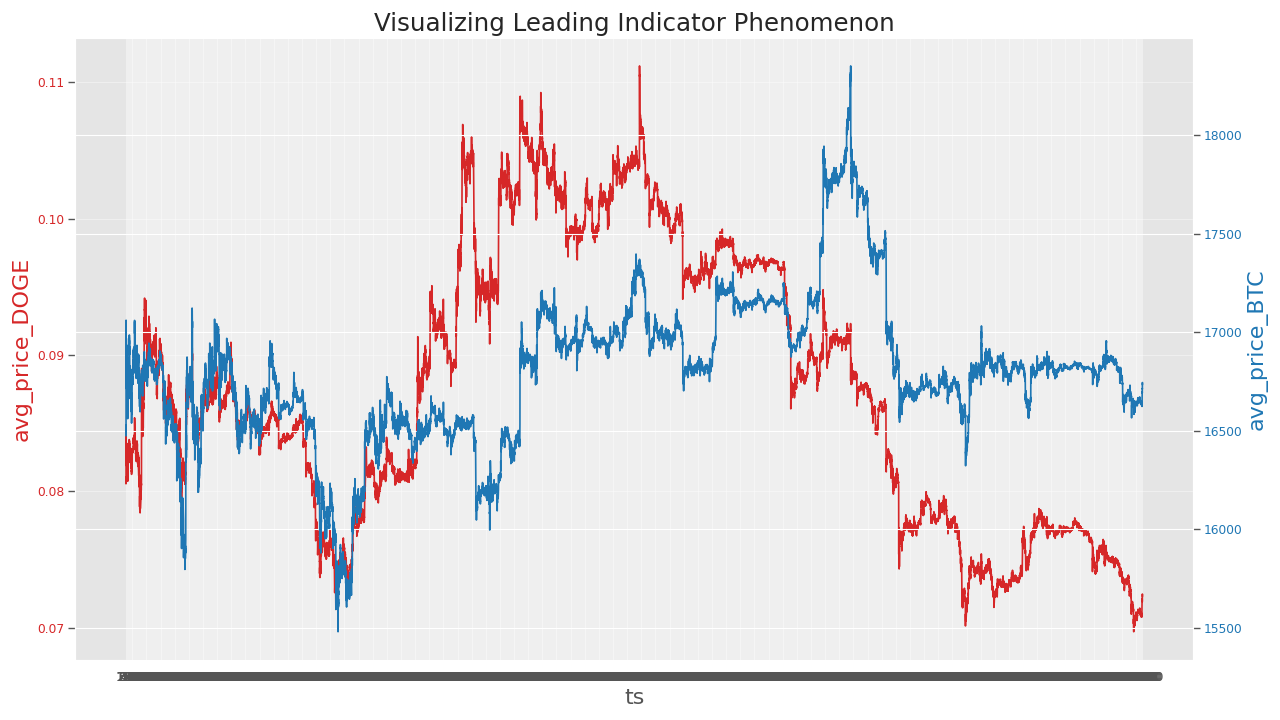

<Figure size 1280x720 with 0 Axes>

In [97]:
GCT("BTC")

In [98]:
causation_matrix(df[["avg_price_DOGE", "avg_price_BTC"]], 2, variables = df[["avg_price_DOGE", "avg_price_BTC"]].columns)

,avg_price_DOGE_X,avg_price_BTC_X
avg_price_DOGE_Y,1.0000,0.0
avg_price_BTC_Y,0.0159,1.0


How to interpret the p-values?

Assuming a significance level of 0.05, if the p-value is lesser than 0.05, then we do NOT reject the null hypothesis that X does NOT granger cause Y.

So, in the above table, the p-value for avg_price_DOGE_X and avg_price_BTC_X is 0.0. So we reject the null hypothesis and conclude that (avg_price_DOGE) granger causes (avg_price_BTC).

That means, XRPBUSD_open will likely be helpful in predicting the APEBUSD_open.

However the p-value for avg_price_DOGE_Y and avg_price_BTC_X is 0.0159.

Since the p-value is less than 0.05, we can reject the null hypothesis. That is, "avg_price_DOGE_X" can predictive of "avg_price_BTC_Y".

Let's calculate Granger Causality Test for other coins:

In [99]:
causation_matrix(df[["avg_price_DOGE", "avg_price_ETH"]], 1, variables = df[["avg_price_DOGE", "avg_price_ETH"]].columns)

,avg_price_DOGE_X,avg_price_ETH_X
avg_price_DOGE_Y,1.0,0.0039
avg_price_ETH_Y,0.0,1.0000


In [100]:
causation_matrix(df[["avg_price_DOGE", "avg_price_BNB"]], 1, variables = df[["avg_price_DOGE", "avg_price_BNB"]].columns)

,avg_price_DOGE_X,avg_price_BNB_X
avg_price_DOGE_Y,1.0000,0.0
avg_price_BNB_Y,0.2899,1.0


In [101]:
causation_matrix(df[["avg_price_DOGE", "avg_price_XRP"]], 1, variables = df[["avg_price_DOGE", "avg_price_XRP"]].columns)

,avg_price_DOGE_X,avg_price_XRP_X
avg_price_DOGE_Y,1.0000,0.0
avg_price_XRP_Y,0.6721,1.0


In [102]:
causation_matrix(df[["avg_price_DOGE", "avg_price_APE"]], 1, variables = df[["avg_price_DOGE", "avg_price_APE"]].columns)

,avg_price_DOGE_X,avg_price_APE_X
avg_price_DOGE_Y,1.000,0.7139
avg_price_APE_Y,0.353,1.0000


In [103]:
causation_matrix(df[["avg_price_DOGE", "avg_price_ADA"]], 1, variables = df[["avg_price_DOGE", "avg_price_ADA"]].columns)

,avg_price_DOGE_X,avg_price_ADA_X
avg_price_DOGE_Y,1.0000,0.002
avg_price_ADA_Y,0.9514,1.000


In [104]:
causation_matrix(df[["avg_price_DOGE", "avg_price_MATIC"]], 1, variables = df[["avg_price_DOGE", "avg_price_MATIC"]].columns)

,avg_price_DOGE_X,avg_price_MATIC_X
avg_price_DOGE_Y,1.0000,0.0788
avg_price_MATIC_Y,0.0487,1.0000


<h2>Conclusion:</h2>
We now have a better idea of what our data looks like and which variables are more related to our main currency DOGEBUSD:
    <li>BNBBUSD</li>
    <li>XRPBUSD</li>
    <li>ADABUSD</li>
    <li>ETHBUSD</li>
As we now move into building machine learning models to automate our analysis, feeding the model with variables that meaningfully affect our target variable will improve our model's prediction performance.

### Thank you for completing this lab!

## Author

<a href="https://www.linkedin.com/in/joseph-s-50398b136/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDA0101ENSkillsNetwork20235326-2021-01-01" target="_blank">Joseph Santarcangelo</a>

### Other Contributors

<a href="https://www.linkedin.com/in/mahdi-noorian-58219234/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDA0101ENSkillsNetwork20235326-2021-01-01" target="_blank">Mahdi Noorian PhD</a>

Bahare Talayian

Eric Xiao

Steven Dong

Parizad

Hima Vasudevan

<a href="https://www.linkedin.com/in/fiorellawever/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDA0101ENSkillsNetwork20235326-2021-01-01" target="_blank">Fiorella Wenver</a>

<a href="https:// https://www.linkedin.com/in/yi-leng-yao-84451275/ " target="_blank" >Yi Yao</a>.

## Change Log

| Date (YYYY-MM-DD) | Version | Changed By | Change Description                 |
| ----------------- | ------- | ---------- | ---------------------------------- |
| 2020-10-30        | 2.1     | Lakshmi    | changed URL of csv                 |
| 2020-08-27        | 2.0     | Lavanya    | Moved lab to course repo in GitLab |

<hr>

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>
